In [1]:
# Common imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")



boston_dataset = load_boston() #load data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) #create pandas dataframe
boston['MEDV'] = boston_dataset.target #set MEDV as target
boston.isnull().sum() #check if there is missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

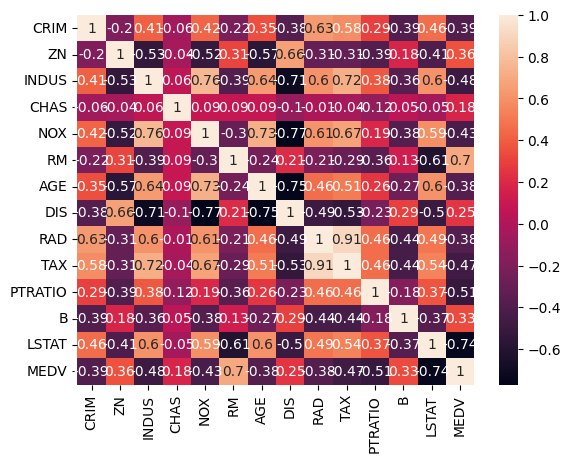

In [2]:
#Plot correlation matrix
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
# Common imports
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

#Set dataframe with choosed parameters picked from initial data
X = pd.DataFrame(np.c_[boston['NOX'], boston['RM'], boston['INDUS'], boston['TAX'], boston['LSTAT'], boston['PTRATIO']], columns = ['NOX','RM','INDUS','TAX','LSTAT','PRATIO'])
#True value of the target
z = boston['MEDV']

# Scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Creating list to store the results
bias = []
variance = []
bias_variance = []
testing_error=[]
training_error =[]
testing_r2=[]
training_r2 =[]

#number of kfolds
k_folds = 10

#Polynomial order
n = 4

for poly in range (1,n+1): #loop for the polynomial order
    mse_test=[]
    r2_test=[]
    mse_train=[]
    r2_train=[]
    
    #Make folds using SKlearn
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(X_scaled)
    
    i = 0
    for train_index, test_index in kf.split(X_scaled):
        # #Make train and test data using the folds made by SKlearn
        X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
        z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
        
        # Fit training data usink SKlearn
        lin_model=make_pipeline(PolynomialFeatures(poly),LinearRegression())
        lin_model.fit(X_train_scaled,z_train)

        # model evaluation for training set
        z_train_predict = lin_model.predict(X_train_scaled)
        mse_train = (np.sqrt(mean_squared_error(z_train, z_train_predict)))
        r2_train = r2_score(z_train, z_train_predict)
        
        # model evaluation for testing set
        z_test_predict = lin_model.predict(X_test_scaled)
        mse_test = (np.sqrt(mean_squared_error(z_test, z_test_predict)))
        r2_test = r2_score(z_test, z_test_predict)
        
        # Increment counter i
        i = i + 1
        
    # Print MSE and R2
    print('Polynomial degree:', poly)
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    training_error.append(np.mean(mse_train))
    print('RMSE is {}'.format(np.mean(mse_train)))
    training_r2.append(np.mean(r2_train))
    print('R2 score is {}'.format(np.mean(r2_train)))
    print("\n")

    print("The model performance for testing set")
    print("--------------------------------------")
    testing_error.append(np.mean(mse_test))
    print('RMSE is {}'.format(np.mean(mse_test)))
    testing_r2.append(np.mean(r2_test))
    print('R2 score is {}'.format(np.mean(r2_test)))
    print("\n")

    #filling lists with the result for each polynomial order
    variance.append(np.mean(np.var( z_test_predict , axis=0, keepdims=True)))
    bias.append(np.mean( (z_test - np.mean( z_test_predict , axis=0, keepdims=True))**2 ))
    bias_variance.append(variance[poly-1]+bias[poly-1])

Polynomial degree: 1


The model performance for training set
--------------------------------------
RMSE is 5.134783779711608
R2 score is 0.6948337632921128


The model performance for testing set
--------------------------------------
RMSE is 5.692867924876934
R2 score is 0.5116806825197546


Polynomial degree: 2


The model performance for training set
--------------------------------------
RMSE is 3.321546445114774
R2 score is 0.8723053153742056


The model performance for testing set
--------------------------------------
RMSE is 4.7224436713406375
R2 score is 0.663972159251943


Polynomial degree: 3


The model performance for training set
--------------------------------------
RMSE is 2.6456686052036553
R2 score is 0.9189854454625215


The model performance for testing set
--------------------------------------
RMSE is 4.332459531177924
R2 score is 0.7171796093026844


Polynomial degree: 4


The model performance for training set
--------------------------------------
RMSE is 2.

[5.134783779711608, 3.321546445114774, 2.6456686052036553, 2.8217461668815464]
[5.692867924876934, 4.7224436713406375, 4.332459531177924, 11.488522436158329]


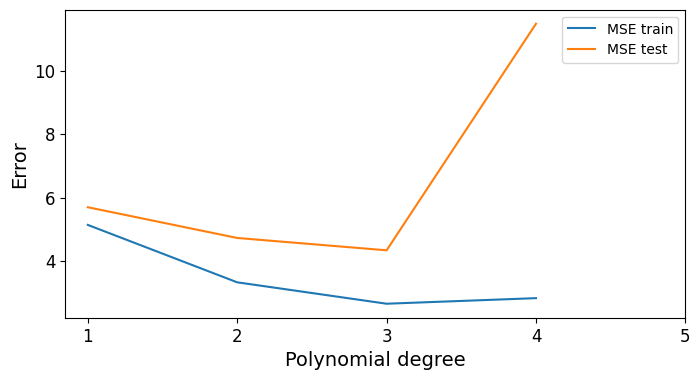

In [8]:
plt.figure(figsize=(8,4))
plt.plot(training_error, label="MSE train")
print(training_error)
plt.plot(testing_error, label="MSE test")
print(testing_error)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("Polynomial degree", fontsize=14)
plt.ylabel("Error", fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

[0.6948337632921128, 0.8723053153742056, 0.9189854454625215, 0.9078430594976319]
[0.5116806825197546, 0.663972159251943, 0.7171796093026844, -0.9887035174050509]


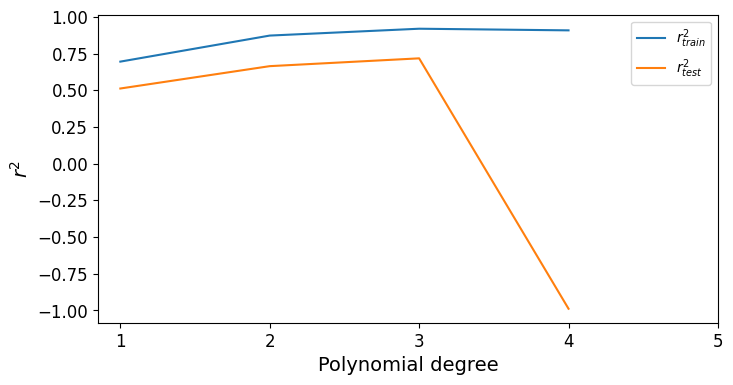

In [9]:
plt.figure(figsize=(8,4))
plt.plot(training_r2, label=r'$r^2_{train}$')
print(training_r2)
plt.plot(testing_r2, label=r'$r^2_{test}$')
print(testing_r2)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4],["1","2","3","4","5"], fontsize=12)
plt.xlabel("Polynomial degree", fontsize=14)
plt.ylabel(r'$r^2$', fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

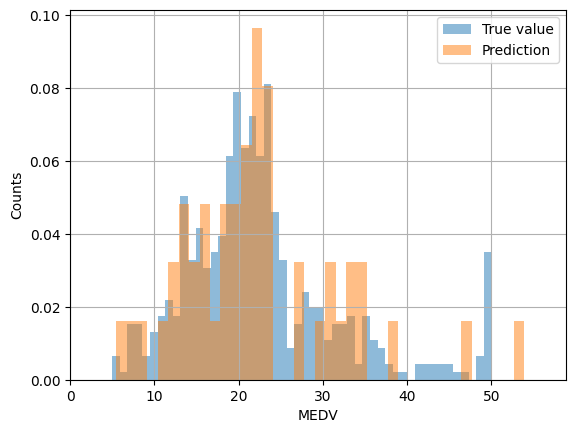

In [14]:
from matplotlib import pyplot
pyplot.hist(boston['MEDV'], 50, density=True, alpha=0.5, label='True value')
pyplot.hist(z_test_predict, 80, density=True, alpha=0.5, label='Prediction')
plt.xlabel('MEDV')
plt.ylabel('Counts')
plt.xlim(0,)
plt.grid(True)
pyplot.legend(loc='upper right')
plt.show()